# Exercise Sheet 7: Logistic Regression

## Exercise 7.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

    
    
class LogisticRegression(object):
    
    def __init__(self):
        self.w = None   # weights of the model
    
    def loss(self,X,y,lam=0): # TODO: add arguments if needed
        """ Computes empirical risk"""
        X = np.array(X)
        y = np.array(y)
        m,n = X.shape
        X0 = np.c_[np.ones(m),X]
        h = 1/(1+np.exp(-X0 @ self.w))
        l = -1/m*(y @ np.log(h) + (1-y) @ np.log(1-h)) + lam/(2*m) * (self.w.T @ self.w)
        return l

    def fit(self, X,y,eta, t, lam=0, plot=True, epsilon=1e-7): # TODO: add arguments if needed
        """ Fit linear logistic regression model 
            Input:
                X:  2-dim binary Array of shape (m,n), 
                    where m is the number of examples and n is the dimension of the data
                y:  Array of length m containing the class label of each example in X
            Output: 
                LOSS:   Array or list of loss values: 
                        LOSS[i] contains the loss after the update in iteration i
                        LOSS[0] is the loss of the initial model
                ACCURACY: Array or list of accuracy values: 
                eta:  learning rate
                t: maximun iteration times
                lam: L2-regulation parameter
        """
        self.w = np.array([0.5,0.5,0.5])
        X = np.array(X)
        y = np.array(y)
        m,n = X.shape
        X0 = np.c_[np.ones(m),X]
        LOSS = []
        LOSS.append(self.loss(X,y,lam))
        ACCURACY = []
        ACCURACY.append(1 - np.mean(abs(self.predict(X)-y)))          
        for _ in range(t):
            h = 1/(1+np.exp(-X0 @ self.w))                 
            # calculate gradient
            gradient = ((X0.T @ (h - y))+ lam*self.w)/m      
            #check termination criteria
            #if (np.linalg.norm(eta * gradient) < epsilon):
                #break
            #eta *= 0.9
            self.w -= eta * gradient
            LOSS.append(self.loss(X,y,lam))
            ACCURACY.append(1 - np.mean(abs(self.predict(X)-y)))
        
        # TODO: find weights by gradient descent. compute loss and accuracy after each update 
        #       and append it to the lists LOSS and ACCURACY.
        #       Store fitted weights in self.w
        print(self.w)
        return LOSS,ACCURACY
        
    def predict(self, X):
        """ compute predicted labels
            Input:
                X:         Data matrix, format as described in fit()
            Output: 
                y_pred:    list of predicted labels
                
        """
        # TODO
        X = np.array(X)
        m,n = X.shape
        X0 = np.c_[np.ones(m),X]
        h = 1/(1+np.exp(-X0 @ self.w))
        y_pred = np.round(h)
        return y_pred
        
        
    def evaluate(self, X, y):
        """ Evaluates the fitted model on test data X,y
            Input:
                X: Data matrix, format as described in fit()
                y: Labels, format as described in fit()
            Returns:
                acc: Accuracy
        """
        prediction = self.predict(X)
        acc = sum(prediction == y) / len(y)
        return acc
    
    ### TODO: Exercise 7.5.2  ###
    def most_sure(self, X, y):
        """ Finds and plots the example in X for which the classifier is most sure
        """
        probability = None
        y_true = None
        y_pred = None
        x = None
        print('Most sure prediction: probability = ',probability, '   true label = ',y_true, '   predicted label = ',y_pred )
        plot_mnist(x)
        
    ### TODO: Exercise 7.5.2  ### 
    def least_sure(self, X, y):
        """ Finds and plots the example in X for which the classifier is least sure (most unsure).
        """
        probability = None
        y_true = None
        y_pred = None
        x = None
        print('Least sure prediction: probability = ',probability, '   true label = ',y_true, '   predicted label = ',y_pred )
        plot_mnist(x)


## Exercise 7.4

[-6.07383825  0.95104192 -1.19002435]
[-5.94375299  0.93142006 -1.17631202]
[-5.05966651  0.79425188 -1.10140078]
[-2.88909572  0.43968623 -1.02286987]
[-1.02661016  0.15768317 -0.92271352]


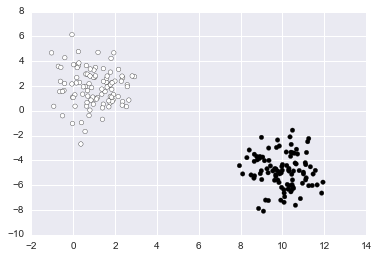

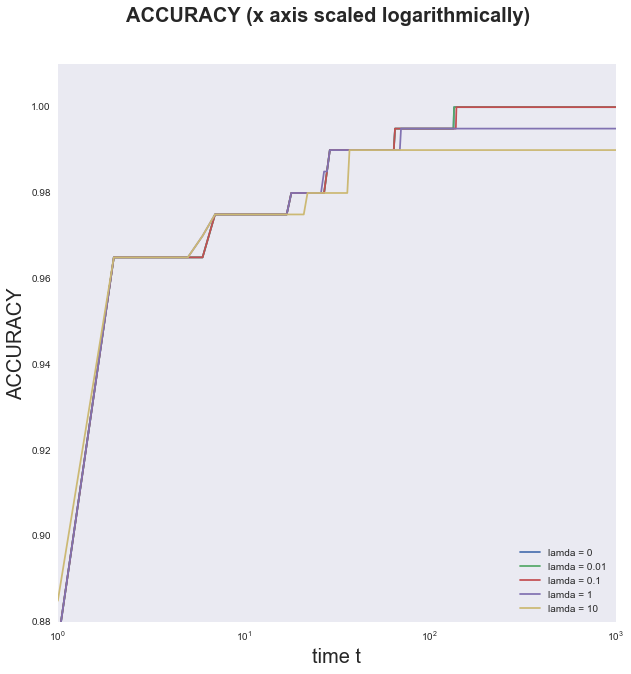

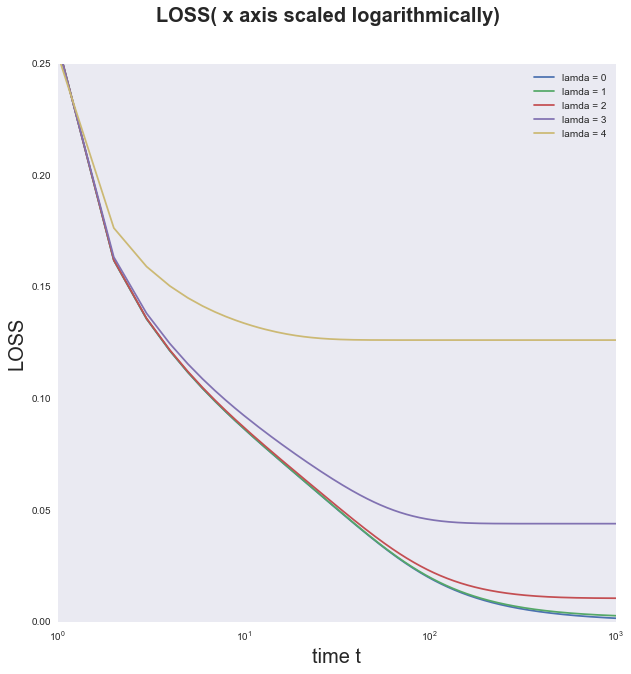

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def get_toy_data():
    n = 100
    X1 = np.random.multivariate_normal([1,2],[[1, 0],[0, 2]], n)
    X2 = np.random.multivariate_normal([10,-5],[[1, 0.2],[0.2, 2]], n)
    X = np.concatenate((X1,X2),axis=0)
    y = np.array([0]*n + [1]*n)
    return X,y

X,y = get_toy_data()

plt.scatter(X[:,0],X[:,1],c=y)

classifier = LogisticRegression()

# TODO:
# train classifier without regularization
LOSS0,ACCURACY0 = classifier.fit(X,y,1,1000, lam=0, plot=True, epsilon=1e-7)






# train classifier with regularization
LOSS1,ACCURACY1 = classifier.fit(X,y,1,1000, lam=0.01, plot=True, epsilon=1e-7)
LOSS2,ACCURACY2 = classifier.fit(X,y,1,1000, lam=0.1, plot=True, epsilon=1e-7)
LOSS3,ACCURACY3 = classifier.fit(X,y,1,1000, lam=1, plot=True, epsilon=1e-7)
LOSS4,ACCURACY4 = classifier.fit(X,y,1,1000, lam=10, plot=True, epsilon=1e-7)
# plot ACCURACY and LOSS curves for both models

plt.figure(figsize=(10,10))
plt.suptitle("ACCURACY (x axis scaled logarithmically)", size=20, fontweight='bold')
plt.xlabel("time t",size=20)
plt.ylabel("ACCURACY",size=20)
plt.semilogx(ACCURACY0,label= "lamda = 0")
plt.semilogx(ACCURACY1,label= "lamda = 0.01")
plt.semilogx(ACCURACY2,label= "lamda = 0.1")
plt.semilogx(ACCURACY3,label= "lamda = 1")
plt.semilogx(ACCURACY4,label= "lamda = 10")
plt.ylim(0.88,1.01)
plt.legend(loc='lower right')
plt.grid() 

plt.figure(figsize=(10,10))
plt.suptitle("LOSS( x axis scaled logarithmically)", size=20, fontweight='bold')
plt.xlabel("time t",size=20)
plt.ylabel("LOSS",size=20)
plt.semilogx(LOSS0,label= "lamda = 0" )
plt.semilogx(LOSS1,label= "lamda = 1" )
plt.semilogx(LOSS2,label= "lamda = 2" )
plt.semilogx(LOSS3,label= "lamda = 3" )
plt.semilogx(LOSS4,label= "lamda = 4" )
plt.ylim(0,0.25)
plt.legend(loc='upper right')
plt.grid() 

plt.show()

(2000, 2000)
(200,)


TypeError: Input z must be a 2D array.

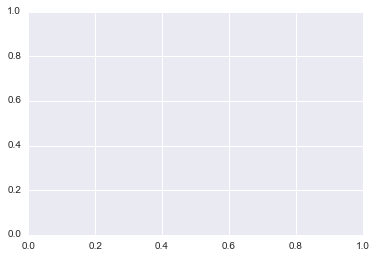

In [7]:
from matplotlib.colors import ListedColormap
xx1, xx2 = np.meshgrid(np.arange(-10, 10, 0.01),np.arange(-10, 10, 0.01))
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y))])
print(xx1.shape)
print(y.shape)
plt.contourf(xx1,xx2,y ,alpha=0.3,cmap=cmap)

In [ ]:
from matplotlib.colors import ListedColormap
xx1, xx2 = np.meshgrid(np.arange(-10, 10, 0.01),np.arange(-10, 10, 0.01))
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1,xx2, y,alpha=0.3,cmap=cmap)

## Exercise 7.5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_mnist(path, classes = range(10)):
    """ Load data from mnist dataset stored in csv format. 
        Rows correspond to examples.
        First column are the labels, all other columns constitute the data.
        Each image is 28 x 28 stored as 784-dim. vector .
        Input: 
            path      path to csv file
            classes   list of classes to extract
        Output:
            data      design matrix holding the images
            labels    array of corresponding labels
    
    """
    df = pd.read_csv(path, header=None)
    lab = np.array(df.iloc[:,0])
    dat = np.array(df.iloc[:,1:])

    ind = [c in classes for c in lab]

    data = dat[ind,:]
    labels = lab[ind]

    return data,labels

def plot_mnist(x):
    """ Plot an mnist image.
        Input:
            x      784-dim. vector representing a grayscale image of size 28 x 28.
    """
    img = np.reshape(x,(28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

# load data
data_test, labels_test = load_mnist('mnist_test.csv', classes = [2,9])
data_train, labels_train = load_mnist('mnist_train.csv', classes = [2,9])

# TODO: further steps if needed



In [6]:
# execute to run Exercise 7.5 # 
import matplotlib.pyplot as plt

classifier = LogisticRegression()

LOSS,ACC = classifier.fit(data_train,labels_train,...# TODO: add parameters)
plt.plot(LOSS, label='loss')
plt.plot(ACC, label='accuracy')
plt.xlabel('Iteration')
plt.legend()
plt.show()
                      
acc_test = classifier.evaluate(data_test,labels_test)
acc_train = classifier.evaluate(data_train,labels_train)
print('Test Accuracy =',acc_test)
print('Train Accuracy =',acc_train)

classifier.most_sure(data_test,labels_test)
classifier.least_sure(data_test,labels_test)

# Exercise 7.5.3
w = classifier.w
# TODO: plot weights as image using plot_mnist()


SyntaxError: invalid syntax (<ipython-input-6-37b74af9ad87>, line 6)